![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [36]:
# Start your code here!
import pandas as pd

In [37]:
men = pd.read_csv('men_results.csv')
women = pd.read_csv('women_results.csv')

print(men.info())

print(women.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44353 entries, 0 to 44352
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  44353 non-null  int64 
 1   date        44353 non-null  object
 2   home_team   44353 non-null  object
 3   away_team   44353 non-null  object
 4   home_score  44353 non-null  int64 
 5   away_score  44353 non-null  int64 
 6   tournament  44353 non-null  object
dtypes: int64(3), object(4)
memory usage: 2.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4884 non-null   int64 
 1   date        4884 non-null   object
 2   home_team   4884 non-null   object
 3   away_team   4884 non-null   object
 4   home_score  4884 non-null   int64 
 5   away_score  4884 non-null   int64 
 6   tournament  4884 non-null   object
dtypes: int

In [38]:
print(f"Tourney Counts Men: {men['tournament'].value_counts()}")
print(f"Tourney Counts Women: {women['tournament'].value_counts()}")

Tourney Counts Men: Friendly                                17519
FIFA World Cup qualification             7878
UEFA Euro qualification                  2585
African Cup of Nations qualification     1932
FIFA World Cup                            964
                                        ...  
Real Madrid 75th Anniversary Cup            1
Évence Coppée Trophy                        1
Copa Confraternidad                         1
TIFOCO Tournament                           1
FIFA 75th Anniversary Cup                   1
Name: tournament, Length: 141, dtype: int64
Tourney Counts Women: UEFA Euro qualification                 1445
Algarve Cup                              551
FIFA World Cup                           284
AFC Championship                         268
Cyprus Cup                               258
African Championship qualification       226
UEFA Euro                                184
African Championship                     173
FIFA World Cup qualification             172
CON

In [39]:
#added a feature to keep track of goals_scored better
men['total_score'] = men['home_score'] + men['away_score']
women['total_score'] = women['home_score'] + women['away_score']

In [40]:
#filter only matches from FIA World Cup since 2002-01-01
#change it to datetime for easier filtering
men['date'] = pd.to_datetime(men['date'])
women['date'] = pd.to_datetime(women['date'])

filtered_men = men[(men['tournament'] == 'FIFA World Cup') & (men['date'] >= '2002-01-01')]

filtered_women = women[(women['tournament'] == 'FIFA World Cup') & (women['date'] >= '2002-01-01')]

Men's Sample Size: 384
Women's Sample Size: 200


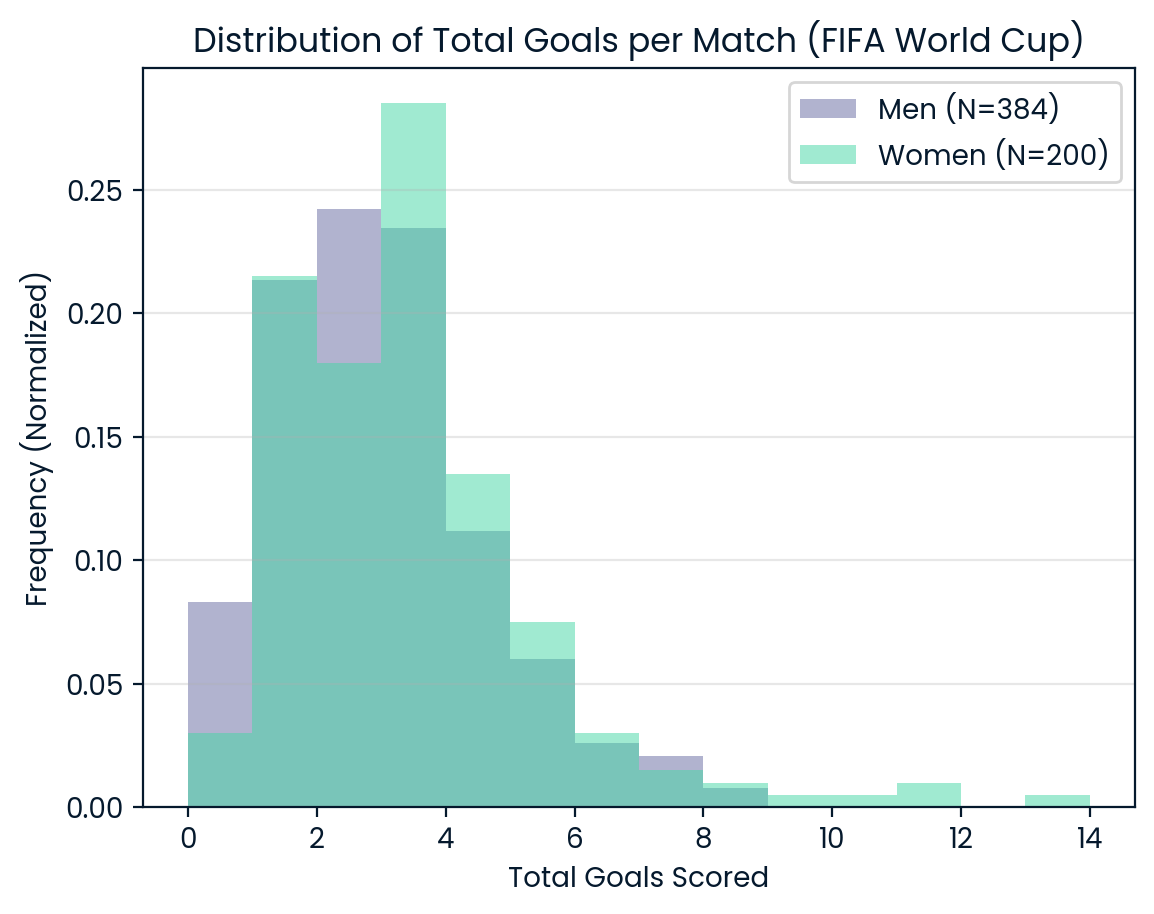

In [41]:
import matplotlib.pyplot as plt

#we have a clear example of unpaired 2-sample test, question is what do we use t-test or WMM?

#to see what to use we need to run some tests

#sample size check, 
n_men = len(filtered_men)
n_women = len(filtered_women)

print(f"Men's Sample Size: {n_men}")
print(f"Women's Sample Size: {n_women}")

# plot Men's Goals (Blue)
plt.hist(filtered_men['total_score'], alpha=0.5, label=f'Men (N={n_men})', bins=range(0, 15), density=True)

# plot Women's Goals (Orange)
plt.hist(filtered_women['total_score'], alpha=0.5, label=f'Women (N={n_women})', bins=range(0, 15), density=True)

plt.title("Distribution of Total Goals per Match (FIFA World Cup)")
plt.xlabel("Total Goals Scored")
plt.ylabel("Frequency (Normalized)")
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()

Poisson distribution (right-skewed), the bell curve is no longer here so we can assume a WMM test would suffice

In [42]:
#using scipy for this
from scipy.stats import mannwhitneyu as mwu

stat, p_value = mwu(
    filtered_women['total_score'], 
    filtered_men['total_score'], 
    #one sided: 1st arg > 2nd arg
    alternative='greater'
)

print(f"Mann-Whitney U One-Sided P-value: {p_value}")

alpha = 0.1

if p_value < alpha:
    print("REJECT Null Hypothesis: Men score significantly MORE goals than Women.")
else:
    print("FAIL TO REJECT Null Hypothesis: No significant evidence that Men score more.")

Mann-Whitney U One-Sided P-value: 0.005106609825443641
REJECT Null Hypothesis: Men score significantly MORE goals than Women.


In [43]:
result_dict = {"p_val": p_value, "result":"reject"}